In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import Dataset
df = pd.read_csv("/content/4156718-laptop (1).zip")
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.shape

(1303, 13)

In [6]:
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,30
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30


In [7]:
df= df.drop(columns=['Unnamed: 0','Unnamed: 0.1'])

In [8]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [9]:
df= df.dropna()

In [10]:
#Recheking The Shape
df.shape

(1273, 11)

In [11]:
  #Checking the duplicates
  df.duplicated().sum()

np.int64(29)

In [12]:
#Droping Duplicates
df= df.drop_duplicates()
df.shape

(1244, 11)

In [13]:
# Drop duplicates and missing values
df = df.drop_duplicates()
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)


In [14]:
df.shape

(1241, 11)

In [15]:
# Remove rows where critical columns are still '?'
df = df[df["Inches"] != "?"]
df = df[df["Weight"] != "?"]
df = df[df["Memory"] != "?"]


In [16]:
  #Changing The data type
# Convert 'Inches' to float
df['Inches'] = df['Inches'].astype(float)

# Check if 'Ram' is of string type before applying .str accessor
if pd.api.types.is_string_dtype(df['Ram']):
    df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

# Check if 'Weight' is of string type before applying .str accessor and remove 'kg'
if pd.api.types.is_string_dtype(df['Weight']):
    df['Weight'] = df['Weight'].str.replace('kg', '', regex=False).astype(float)

# Display the data types of the updated columns
print(df[['Inches', 'Ram', 'Weight']].dtypes)

Inches    float64
Ram         int64
Weight    float64
dtype: object


In [17]:
# Extract SSD and HDD from Memory column
def process_memory(mem):
    mem = mem.replace('GB', '').replace('TB', '000')
    parts = mem.split('+')
    ssd = hdd = 0
    for part in parts:
        if 'SSD' in part:
            ssd = int(''.join(filter(str.isdigit, part)))
        elif 'HDD' in part:
            hdd = int(''.join(filter(str.isdigit, part)))
    return pd.Series([ssd, hdd])

df[['SSD','HDD']] = df['Memory'].apply(process_memory)
df.drop(columns='Memory', inplace=True)

In [ ]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200


In [18]:
# FEATURE ENGINEERING BLOCK
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

res = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')
df['X_res'] = res[0].astype(float)
df['Y_res'] = res[1].astype(float)
df['PPI'] = ((df['X_res']**2 + df['Y_res']**2)**0.5) / df['Inches']

df['Cpu Brand'] = df['Cpu'].apply(lambda x: x.split()[0])
df['Gpu Brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1241 entries, 0 to 1273
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1241 non-null   object 
 1   TypeName          1241 non-null   object 
 2   Inches            1241 non-null   float64
 3   ScreenResolution  1241 non-null   object 
 4   Cpu               1241 non-null   object 
 5   Ram               1241 non-null   int64  
 6   Gpu               1241 non-null   object 
 7   OpSys             1241 non-null   object 
 8   Weight            1241 non-null   float64
 9   Price             1241 non-null   float64
 10  SSD               1241 non-null   int64  
 11  HDD               1241 non-null   int64  
 12  Touchscreen       1241 non-null   int64  
 13  IPS               1241 non-null   int64  
 14  X_res             1241 non-null   float64
 15  Y_res             1241 non-null   float64
 16  PPI               1241 non-null   float64
 17  

# Histrogram For numerical Columns

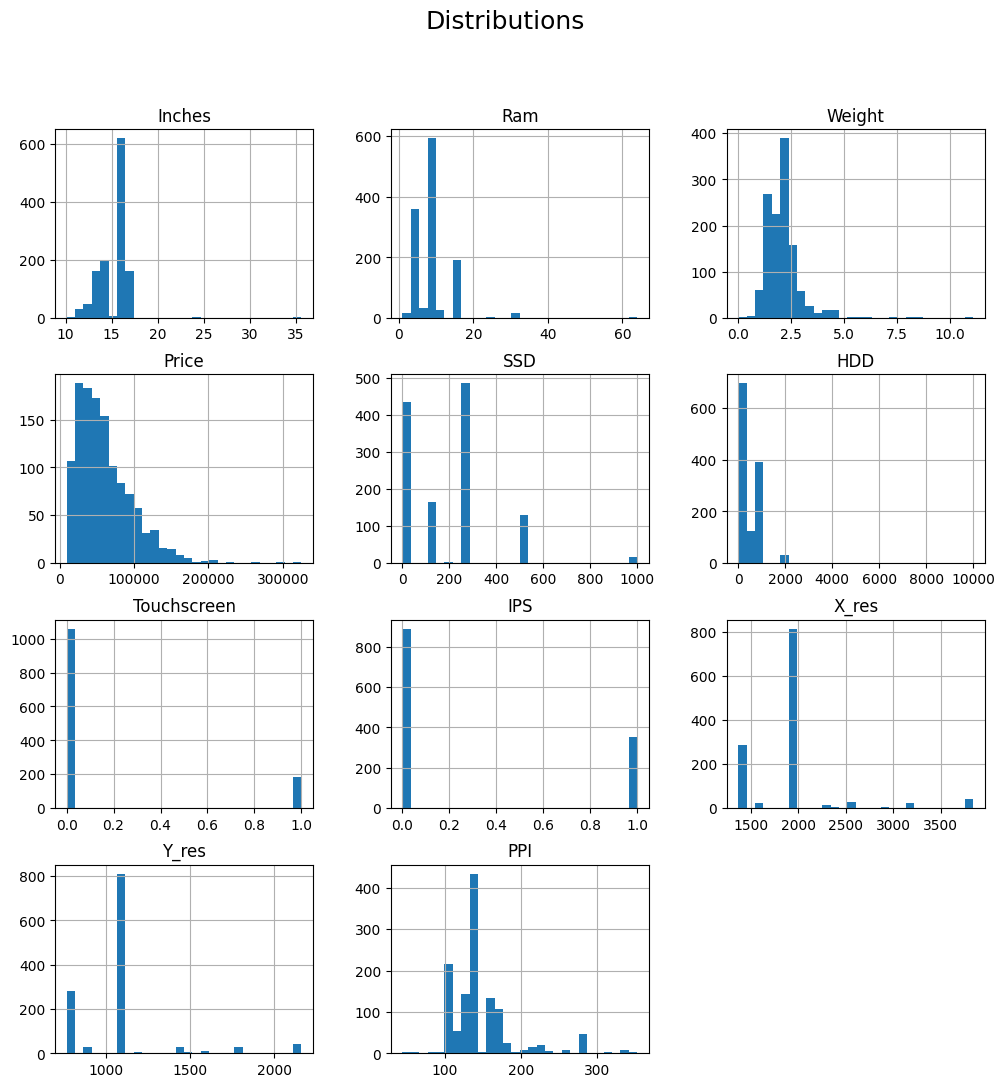

In [20]:
#Histrogram For numerical Columns
df.hist(figsize=(12,12), bins =28)
plt.suptitle("Distributions",fontsize =18)
plt.show()

/tmp/ipython-input-21-4027427883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x= "Company",palette = 'Set2')


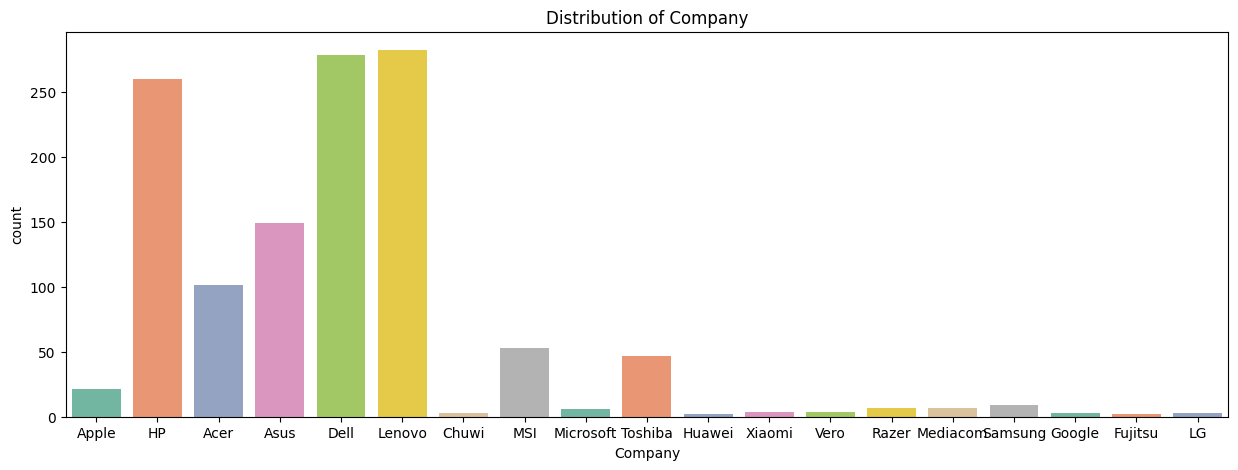

In [21]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df,x= "Company",palette = 'Set2')
plt.title("Distribution of Company")
plt.show()

# Boxplot to check outliers

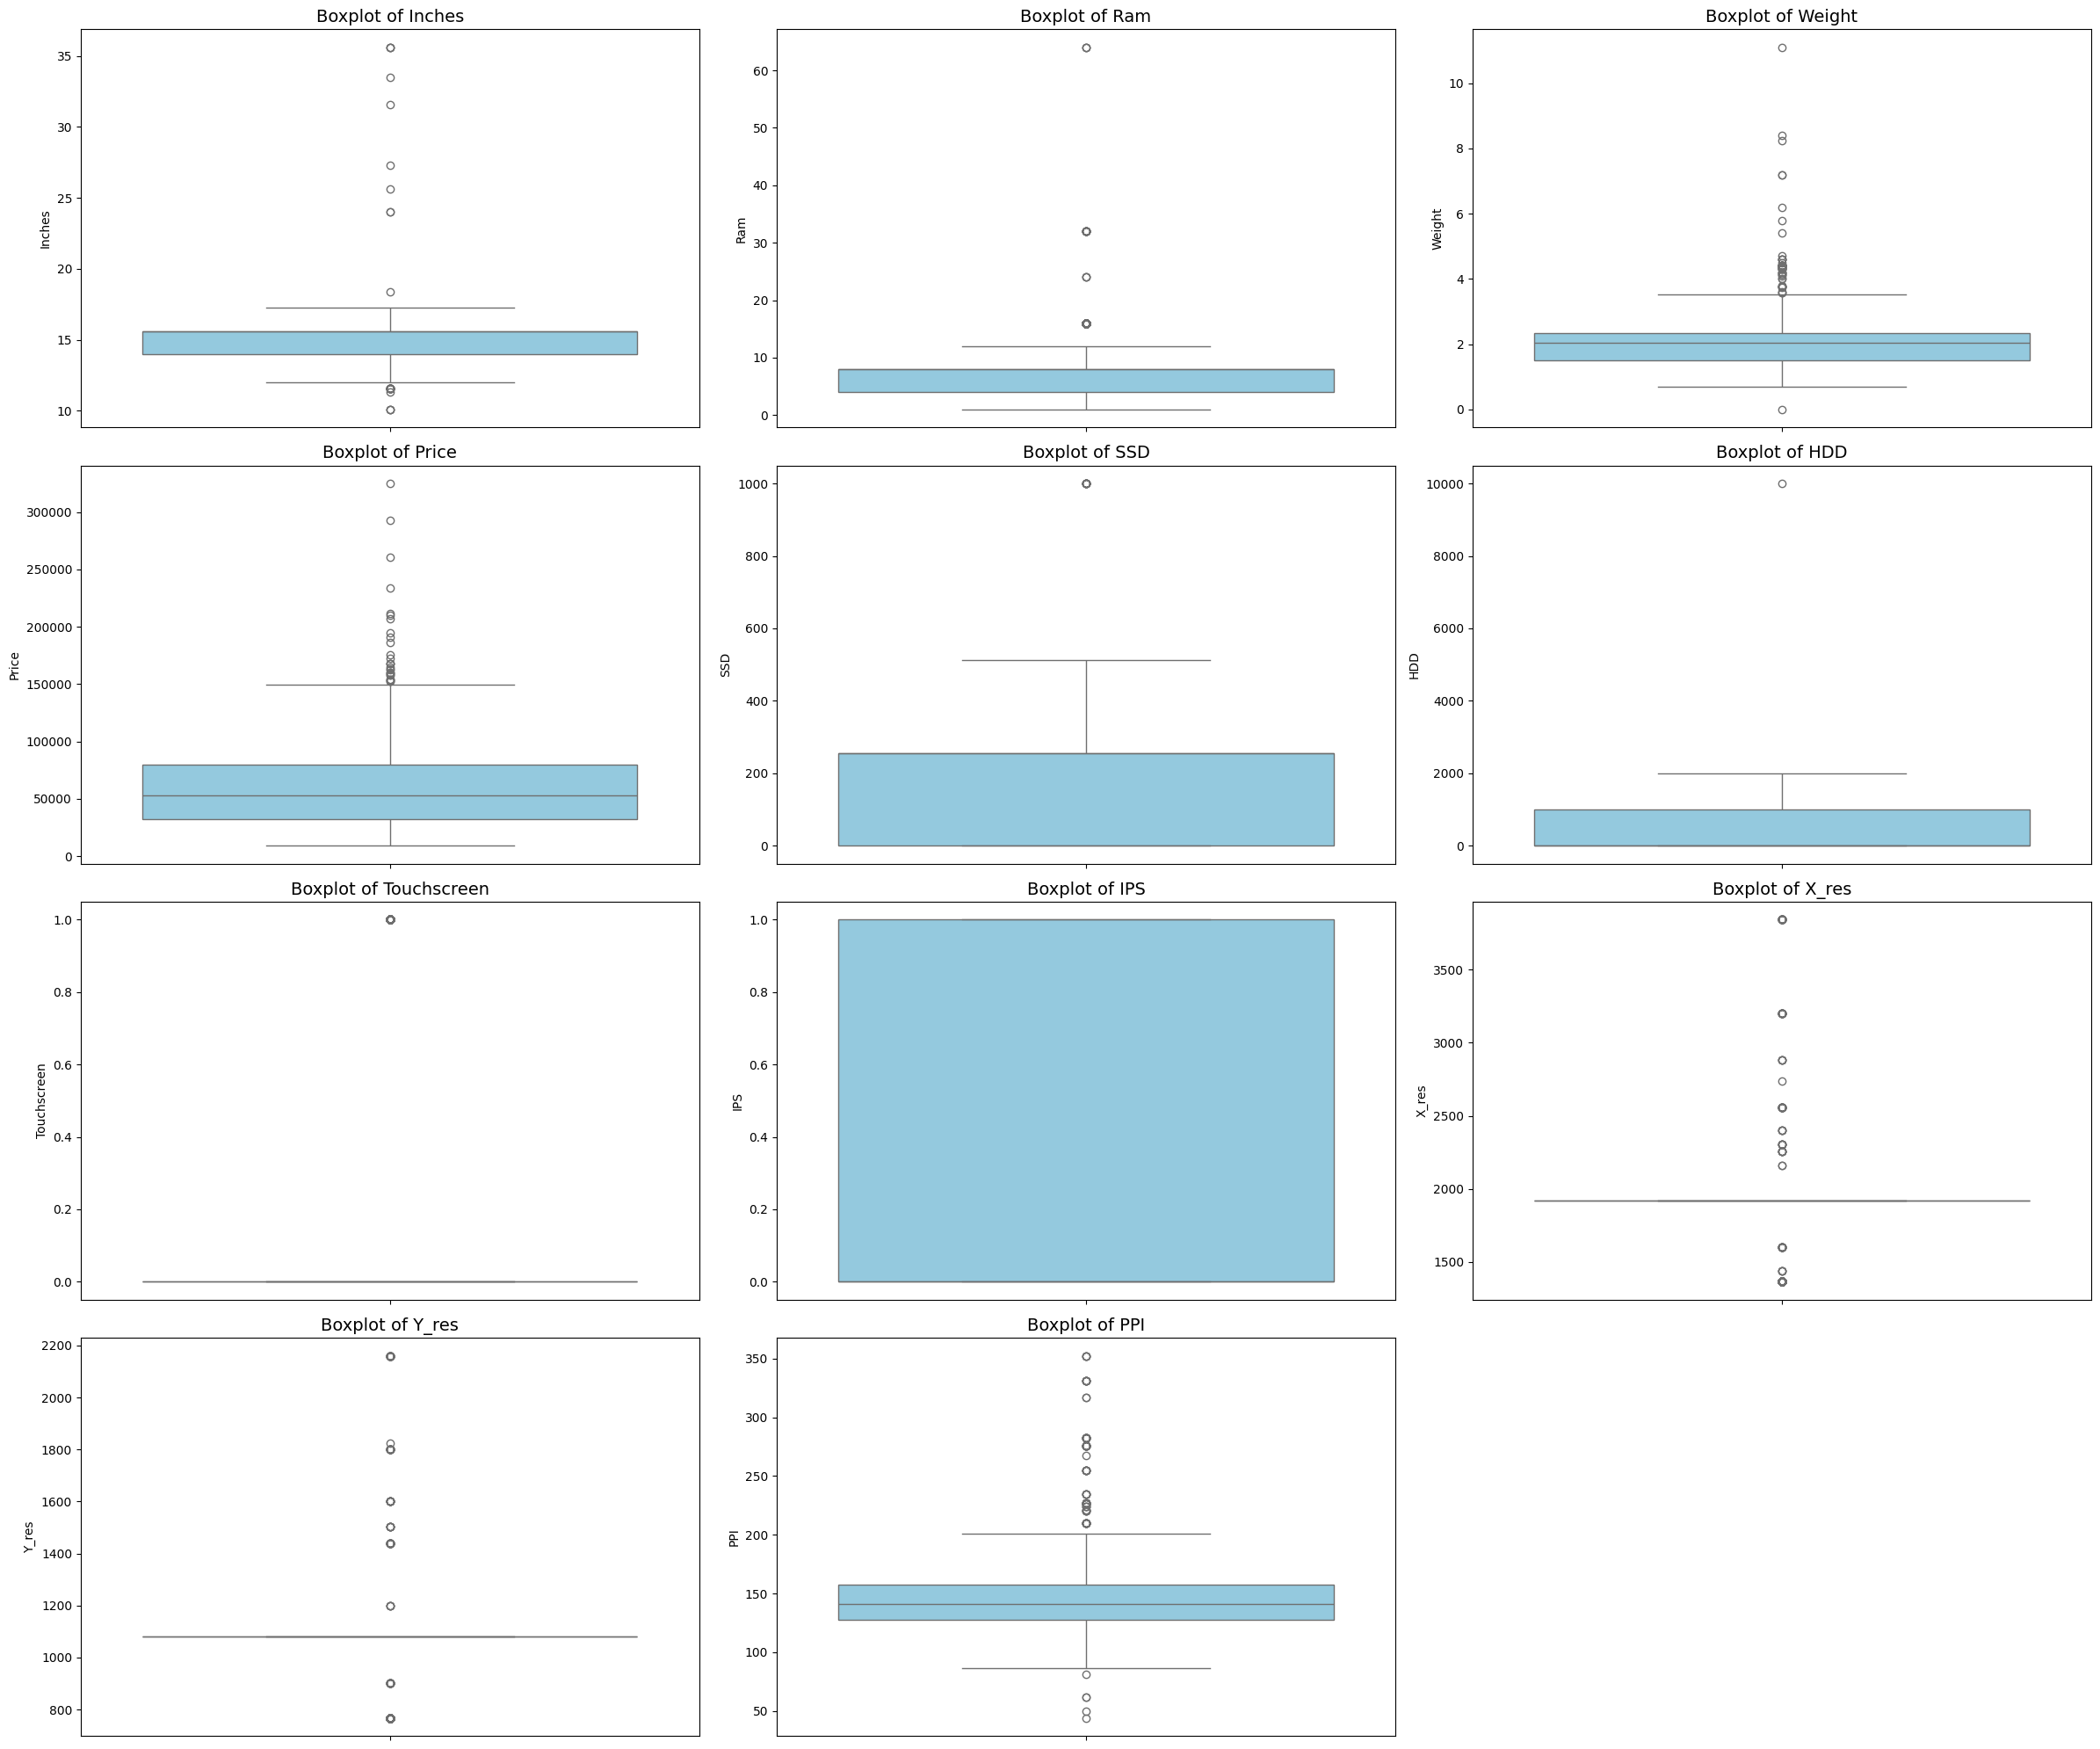

In [22]:
import math

# Select numeric features
num_features = df.select_dtypes(include=['number']).columns

# Setup subplot grid based on number of features
cols = 3
rows = math.ceil(len(num_features) / cols)

plt.figure(figsize=(8 * cols, 5 * rows))

for i, col in enumerate(num_features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=14)
plt.tight_layout()
plt.show()


# Heatmap To Check For Correlation

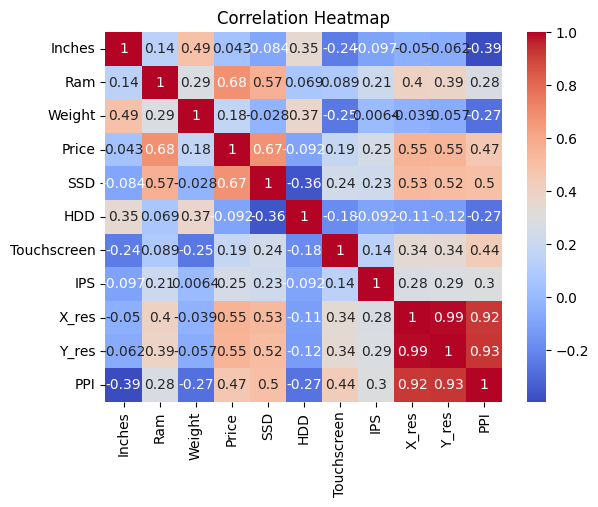

In [24]:
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True,cmap ='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Handling Outliers

In [23]:
# Z-Score outlier detection
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers_z = (z_scores > 3).sum()
print("Outliers Detected Using Z-Score:\n", outliers_z)

Outliers Detected Using Z-Score:
 188


# Removing Outliers Using IQR

In [29]:
# Remove outliers using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_iqr = (numeric_df < lower_bound) | (numeric_df > upper_bound)
df_filter = df[~df_iqr.any(axis=1)]
print(f"Original shape: {df.shape}")
print(f"After IQR outlier removal: {df_filter.shape}")

Original shape: (1241, 19)
After IQR outlier removal: (557, 19)


# Robust Scalar

In [26]:
# Calculate IQR for Price
numeric_df = df.select_dtypes(include=['number'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers_IQR = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()

print("\nOutliers Detected using IQR\n", outliers_IQR)


Outliers Detected using IQR
 Inches          43
Ram            214
Weight          55
Price           28
SSD             15
HDD              1
Touchscreen    181
IPS              0
X_res          426
Y_res          430
PPI            114
dtype: int64


In [27]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [30]:
# Define features and target
X = df_filter[['Company', 'TypeName', 'Ram', 'Weight', 'Touchscreen', 'IPS',
               'PPI', 'Cpu Brand', 'Gpu Brand', 'OpSys', 'SSD', 'HDD']]
y = df_filter['Price']

# Train & Test Split

In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# One-hot Encoding

In [35]:
# One-hot Encoding
categorical_features = ['Company', 'TypeName', 'Cpu Brand', 'Gpu Brand', 'OpSys']
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(drop='first'), categorical_features)
], remainder='passthrough')



# Train & model



In [34]:
# Train model
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Company', 'TypeName',
                                                   'Cpu Brand', 'Gpu Brand',
                                                   'OpSys'])])),
                ('model', RandomForestRegressor(random_state=42))])

# Model 1: Linear Regression

In [36]:
lr_pipeline = Pipeline([
    ('transformer', ct),
    ('model', LinearRegression())
])
lr_pipeline.fit(X_train, y_train)
lr_pred = lr_pipeline.predict(X_test)
print("\n Linear Regression Results")
print("R² Score:", r2_score(y_test, lr_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, lr_pred))


 Linear Regression Results
R² Score: 0.537435313701381
Mean Absolute Error: 11084.183013709622


# Model 2: Random Forest

In [37]:
rf_pipeline = Pipeline([
    ('transformer', ct),
    ('model', RandomForestRegressor(random_state=42))
])
rf_pipeline.fit(X_train, y_train)
rf_pred = rf_pipeline.predict(X_test)
print("\n Random Forest Results")
print("R² Score:", r2_score(y_test, rf_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, rf_pred))


 Random Forest Results
R² Score: 0.6321826872234715
Mean Absolute Error: 9092.174347597078
